In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("stock_prices.csv")
def ADX(df: pd.DataFrame(), interval: int=14):
    df['-DM'] = df['Low'].shift(1) - df['Low']
    df['+DM'] = df['High'] - df['High'].shift(1)
    df['+DM'] = np.where((df['+DM'] > df['-DM']) & (df['+DM']>0), df['+DM'], 0.0)
    df['-DM'] = np.where((df['-DM'] > df['+DM']) & (df['-DM']>0), df['-DM'], 0.0)
    df['TR_TMP1'] = df['High'] - df['Low']
    df['TR_TMP2'] = np.abs(df['High'] - df['Adj Close'].shift(1))
    df['TR_TMP3'] = np.abs(df['Low'] - df['Adj Close'].shift(1))
    df['TR'] = df[['TR_TMP1', 'TR_TMP2', 'TR_TMP3']].max(axis=1)
    df['TR'+str(interval)] = df['TR'].rolling(interval).sum()
    df['+DMI'+str(interval)] = df['+DM'].rolling(interval).sum()
    df['-DMI'+str(interval)] = df['-DM'].rolling(interval).sum()
    df['+DI'+str(interval)] = df['+DMI'+str(interval)] / df['TR'+str(interval)]*100
    df['-DI'+str(interval)] = df['-DMI'+str(interval)] / df['TR'+str(interval)]*100
    df['DI'+str(interval)+'-'] = abs(df['+DI'+str(interval)] - df['-DI'+str(interval)])
    df['DI'+str(interval)] = df['+DI'+str(interval)] + df['-DI'+str(interval)]
    df['DX'] = (df['DI'+str(interval)+'-'] / df['DI'+str(interval)])*100
    df['ADX'+str(interval)] = df['DX'].rolling(interval).mean()
    df['ADX'+str(interval)] =   df['ADX'+str(interval)].fillna(df['ADX'+str(interval)].mean())
    del df['TR_TMP1'], df['TR_TMP2'], df['TR_TMP3'], df['TR'], df['TR'+str(interval)]

    return df

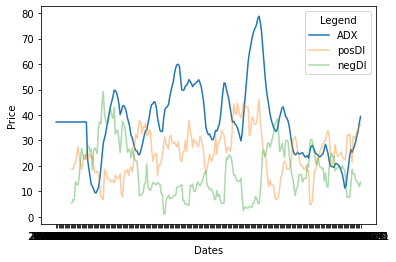

In [2]:
df_adx = ADX(df, 14)
df.dropna()
plt.plot(df.Date, df['ADX14'], )
plt.plot(df.Date, df['+DI14'], alpha = 0.4)
plt.plot(df.Date, df['-DI14'], alpha = 0.4)
plt.legend(['ADX', 'posDI', 'negDI'], title="Legend")
plt.xlabel('Dates')
plt.ylabel('Price')
plt.savefig('ADX plot')
plt.show()